In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

print(tf.__version__)

2.3.0


In [10]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
for data in [train_images, train_labels, test_images, test_labels]:
    print(data.shape, len(data))

(60000, 28, 28) 60000
(60000,) 60000
(10000, 28, 28) 10000
(10000,) 10000


In [6]:
def show_image(images: np, image_num: int):
    plt.figure()
    plt.imshow(images[image_num])
    plt.colorbar()
    plt.grid(False)
    plt.show()

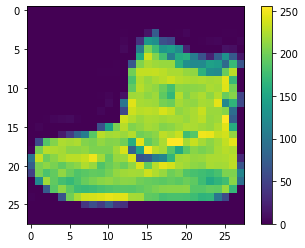

In [11]:
show_image(train_images, 0)

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

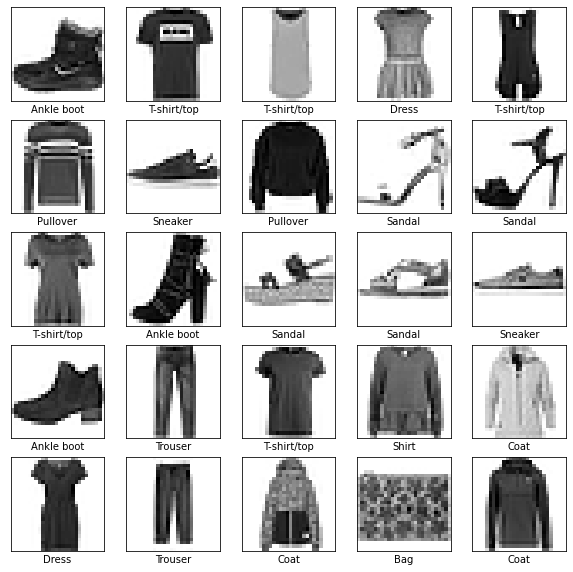

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
keras.optimizers??

In [19]:
model.compile??

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
with tf.device("/device:GPU:0"):
    model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 658us/step - loss: 0.2278 - accuracy: 0.9145
Epoch 2/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.2227 - accuracy: 0.9163
Epoch 3/5
1875/1875 [==============================] - 1s 655us/step - loss: 0.2136 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.2073 - accuracy: 0.9228
Epoch 5/5
1875/1875 [==============================] - 1s 652us/step - loss: 0.2015 - accuracy: 0.9241


In [28]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\ntest accuracy:", test_acc)

313/313 - 0s - loss: 0.3401 - accuracy: 0.8893

test accuracy: 0.8892999887466431


In [29]:
predictions = model.predict(test_images)

predictions[0]

array([5.45334267e-09, 9.26710653e-10, 4.71513550e-10, 1.90266761e-11,
       1.34565905e-08, 9.72436683e-04, 4.82018292e-09, 1.76129700e-03,
       8.19637336e-09, 9.97266293e-01], dtype=float32)

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                        class_names[true_label]), color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

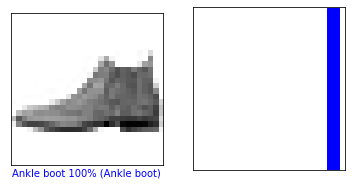

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

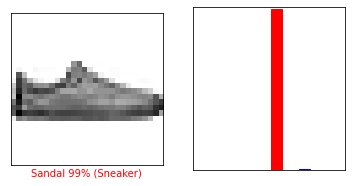

In [35]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

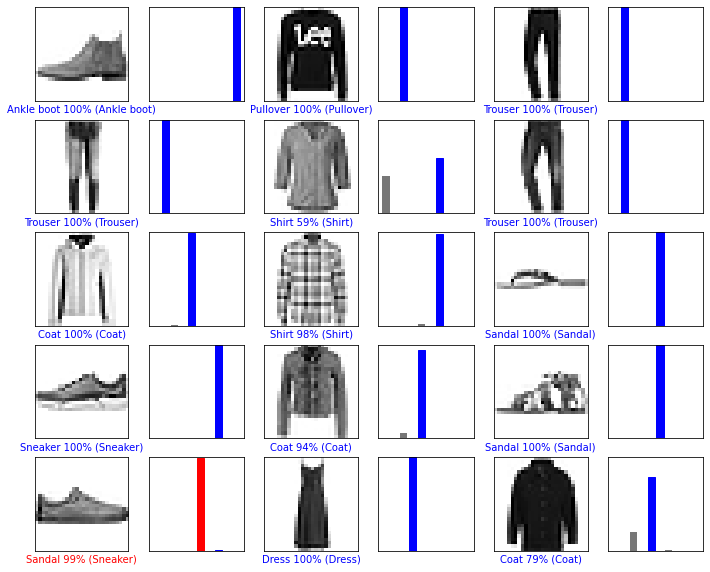

In [37]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()